In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

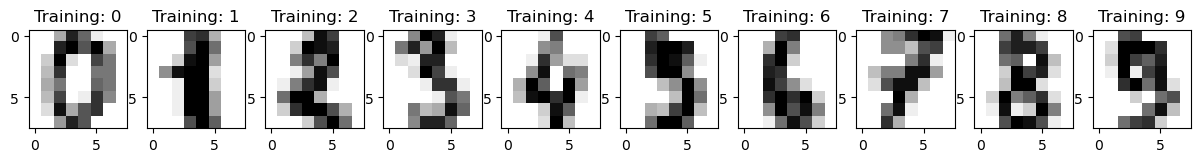

In [6]:
_,axes = plt.subplots(nrows = 1, ncols = 10, figsize = (15,5))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap= plt.cm.gray_r, interpolation = 'nearest' )
    ax.set_title('Training: %i' %label)

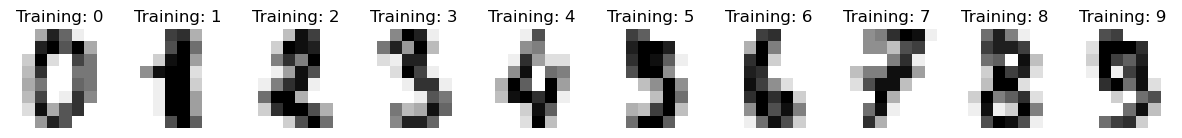

In [7]:
_,axes = plt.subplots(nrows = 1, ncols = 10, figsize = (15,5))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off() # no ticks
    ax.imshow(image, cmap= plt.cm.gray_r, interpolation = 'nearest')
# interpolation = color pixel 
    ax.set_title('Training: %i' %label)

In [8]:
digits.data.shape

(1797, 64)

In [9]:
digits.target.shape

(1797,)

In [10]:
digits.images.shape

(1797, 8, 8)

In [11]:
X = digits.data
y = digits.target

In [12]:
X.shape

(1797, 64)

In [13]:
y.shape

(1797,)

In [14]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [15]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train.shape

(1437, 64)

In [17]:
# LDA - Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=9) # n - 1 = 10-1 = 9
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
X_train.shape

(1437, 9)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = rf.predict(X_test)

In [21]:
from sklearn.metrics import *

In [22]:
accuracy_score(y_test, y_pred)

0.9527777777777777

In [23]:
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 3, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 2, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 3, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 7, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 9, 1, 5,
       5, 2, 4, 2, 8, 8, 9, 8, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 3, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [24]:
y_test

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

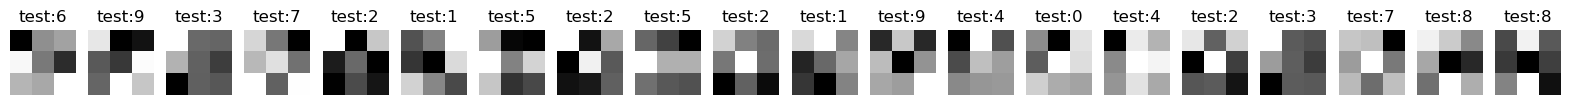

In [26]:
_,axes = plt.subplots(nrows = 1, ncols = 20, figsize =(20,5))
for ax, image, actual in zip(axes, X_test, y_test):
    ax.set_axis_off()
    image = image.reshape(3,3)
    ax.imshow(image, cmap = plt.cm.gray_r,interpolation = 'nearest')
    ax.set_title(f"test:{actual}")

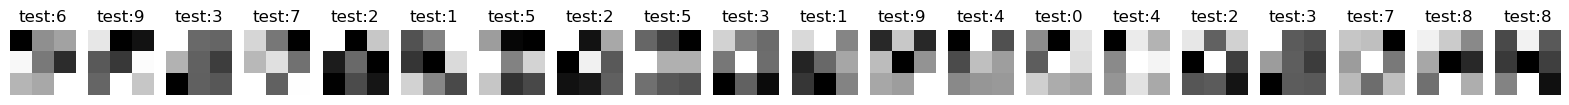

In [27]:
_,axes = plt.subplots(nrows = 1, ncols = 20, figsize =(20,5))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(3,3)
    ax.imshow(image, cmap = plt.cm.gray_r,interpolation = 'nearest')
    ax.set_title(f"test:{prediction}")

In [28]:
def get_misclassified_index(y_pred,y_test):
    misclassification = []
    for index,(predicted, actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
    return misclassification

In [29]:
misclassification = get_misclassified_index(y_pred, y_test)

In [30]:
len(misclassification)

17

In [31]:
def plot_misclassification(misclassification):
    plt.figure(figsize=(20,4))
    for index, wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5, index+1)
        plt.imshow(np.reshape(X_test[wrong], (3,3)), cmap = plt.cm.gray)
        plt.title("Predcited:{} Actual:{}".format(y_pred[wrong], y_test[wrong]))

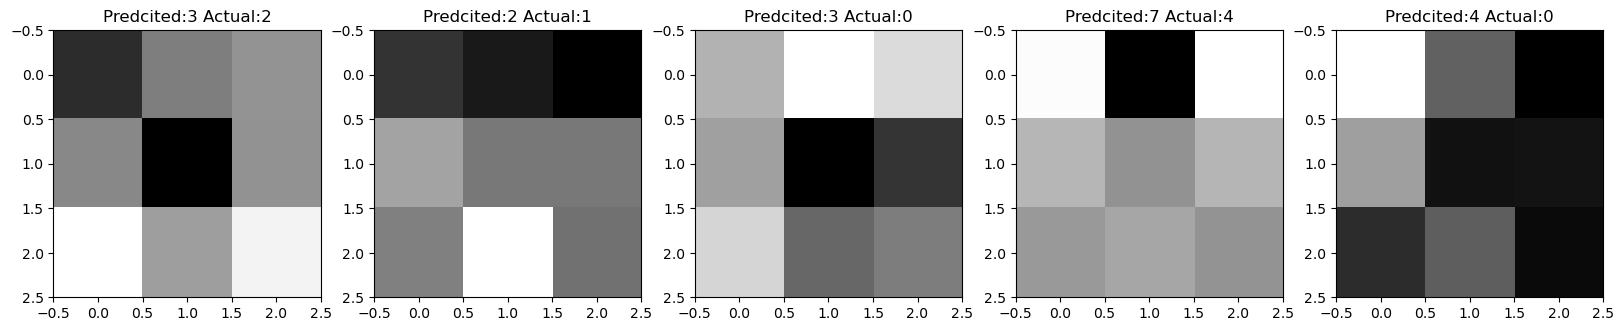

In [32]:
plot_misclassification(misclassification)

In [33]:
from sklearn.metrics import recall_score

recall_class_6 = recall_score(y_test, y_pred, labels=[6], average='micro')

# Convert recall to percentage
recall_percentage_class_6 = recall_class_6 * 100

print(f"Recall for class 6: {recall_percentage_class_6:.2f}%")

Recall for class 6: 97.14%


In [34]:
from sklearn.metrics import accuracy_score

# Identify true positives for class 5
true_positives_class_5 = sum((y_test == 5) & (y_pred == 5))

# Identify true negatives for class 5
true_negatives_class_5 = sum((y_test != 5) & (y_pred != 5))

# Calculate accuracy for class 5
accuracy_class_5 = (true_positives_class_5 + true_negatives_class_5) / len(y_test) * 100

print(f"Accuracy for class 5: {accuracy_class_5:.2f}%")


Accuracy for class 5: 99.17%


In [35]:
from sklearn.metrics import precision_score

# Identify true positives for class 3
true_positives_class_3 = sum((y_test == 3) & (y_pred == 3))

# Identify false positives for class 3
false_positives_class_3 = sum((y_test != 3) & (y_pred == 3))

# Calculate precision for class 3
precision_class_3 = true_positives_class_3 / (true_positives_class_3 + false_positives_class_3) * 100

print(f"Precision for class 3: {precision_class_3:.2f}%")


Precision for class 3: 91.67%
